Optimal Tour:
Start from 8
Go to 10
Go to 7
Go to 1
Go to 4
Go to 3
Go to 5
Go to 6
Go to 2
Go to 9
Return to 8
Minimum Path Cost: 94.96707120985964


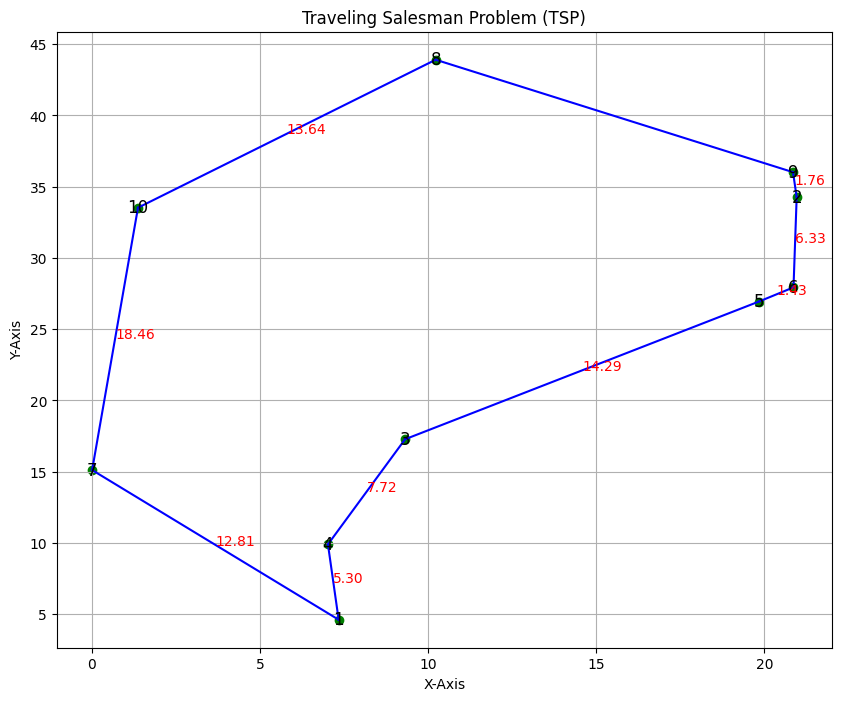

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cities with random coordinates
cities = {'1', '2', '3', '4', '5', '6', '7', '8', '9', '10'}

# Generate random coordinates for each city
np.random.seed(1)
city_coordinates = {city: np.random.rand(2) * 50 for city in cities}

# Calculate distances between cities based on coordinates
def calculate_distances(cities):
    n = len(cities)
    distances = np.zeros((n, n))
    for i, city_i in enumerate(cities):
        for j, city_j in enumerate(cities):
            if i != j:
                distances[i][j] = np.sqrt(np.sum(pow(city_coordinates[city_i] - city_coordinates[city_j],2)))

    return distances

# Define the TSP solver
class TSPSolver:
    def __init__(self, cities, distances):
        self.cities = cities
        self.n = len(cities)
        self.distances = distances
        self.weights = np.zeros((self.n, self.n))
        self.initialize_weights()

    def initialize_weights(self):
        for i in range(self.n):
            for j in range(self.n):
                if i != j:
                    self.weights[i][j] = -self.distances[i][j]

    def energy(self, tour):
        total = 0
        for i in range(self.n - 1):
            total += self.distances[tour[i]][tour[i + 1]]

        total += self.distances[tour[-1]][tour[0]]  # Return to the starting city
        return total

    def solve(self, iterations=100000):
        min_path_cost = float('inf')
        min_path_tour = None
        tour = np.random.permutation(self.n)

        for iteration in range(iterations):
            i, j = np.random.choice(self.n, 2, replace=False)
            delta_energy = 2 * (
                    self.weights[i].dot(tour) * tour[i] +
                    self.weights[j].dot(tour) * tour[j]
            )
            if delta_energy < 0:
                tour[i], tour[j] = tour[j], tour[i]
                path_cost = self.energy(tour)

                if path_cost < min_path_cost:
                    min_path_cost = path_cost
                    min_path_tour = tour.copy()

        return min_path_tour, min_path_cost

# Calculate distances
distances = calculate_distances(cities)

# Create TSP solver instance
tsp_solver = TSPSolver(list(cities), distances)

# Solve TSP
optimal_tour, min_path_cost = tsp_solver.solve()

# Display the solution
print("Optimal Tour:")
for i, city_index in enumerate(optimal_tour):
    if i == 0:
        print(f"Start from {list(cities)[city_index]}")
    else:
        print(f"Go to {list(cities)[city_index]}")
print(f"Return to {list(cities)[optimal_tour[0]]}")

# Display the minimum path cost
print("Minimum Path Cost:", min_path_cost)

# Plot the cities and the tour corresponding to the minimum path cost
plt.figure(figsize=(10, 8))
for city in cities:
    plt.scatter(city_coordinates[city][0], city_coordinates[city][1], color='green')
    plt.text(city_coordinates[city][0], city_coordinates[city][1], city,
             ha='center', va='center', fontsize=12)
for i in range(len(optimal_tour) - 1):
    plt.plot([city_coordinates[list(cities)[optimal_tour[i]]][0],
              city_coordinates[list(cities)[optimal_tour[i + 1]]][0]],
             [city_coordinates[list(cities)[optimal_tour[i]]][1],
              city_coordinates[list(cities)[optimal_tour[i + 1]]][1]],
             color='blue')
plt.plot([city_coordinates[list(cities)[optimal_tour[-1]]][0],
          city_coordinates[list(cities)[optimal_tour[0]]][0]],
         [city_coordinates[list(cities)[optimal_tour[-1]]][1],
          city_coordinates[list(cities)[optimal_tour[0]]][1]],
         color='blue')

# Annotate each path cost along with the path
for i in range(len(optimal_tour) - 1):
    x = (city_coordinates[list(cities)[optimal_tour[i]]][0] +
         city_coordinates[list(cities)[optimal_tour[i + 1]]][0]) / 2
    y = (city_coordinates[list(cities)[optimal_tour[i]]][1] +
         city_coordinates[list(cities)[optimal_tour[i + 1]]][1]) / 2
    plt.text(x, y, f'{distances[optimal_tour[i], optimal_tour[i + 1]]:.2f}', color='red')

plt.title("Traveling Salesman Problem (TSP)")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.grid(True)
plt.show()